In [1]:
import pandas as pd
from os import listdir
from os.path import join
from tqdm import tqdm
from my_funcs import tokenize_es_a, tokenize_es_b, tokenize_es_c, tokenize_es_d 

In [2]:
folder = './datasets/'
for file in reversed(sorted(listdir(folder))): #nos uqedamos con el mas grande en caso de actualizar el ds
    if 'balanced' in file:
        print(f"ds_name = '{file}'")

ds_name = 'ds_semibalanced_1658_rs5150.csv'
ds_name = 'ds_semibalanced_1500_rs5150.csv'
ds_name = 'ds_balanced_1043_rs5150.csv'


In [3]:
#ds_name = 'ds_balanced_1043_rs5150.csv'
ds_name = 'ds_semibalanced_1500_rs5150.csv'
#ds_name = 'ds_semibalanced_1678_rs5150.csv'
print('selected: ', ds_name)

selected:  ds_semibalanced_1500_rs5150.csv


In [4]:
df = pd.read_csv(join(folder, ds_name))
pd.set_option('display.max_colwidth', 200)
print(df.columns)
df[['title', 'content']].head()

Index(['id', 'title', 'content', 'category'], dtype='object')


,title,content
0,Disneyland abre sus puertas como centro vacunatorio masivo contra el coronavirus,"Disneyland abre sus puertas como centro vacunatorio masivo contra el coronavirus. El parque de atracciones Disneyland en Anaheim, California, ha estado cerrado desde mediado de marzo por el alza d..."
1,México autoriza vacuna de Pfizer y es el primer país de Latinoamérica en aprobarla: Inoculación comenzaría este mes,México autoriza vacuna de Pfizer y es el primer país de Latinoamérica en aprobarla: Inoculación comenzaría este mes. La Comisión Federal para la Protección contra Riesgos Sanitarios (Cofepris) del...
2,El mega operativo de seguridad en Washington por la investidura de Biden: Será la ceremonia con más militares de la historia,"El mega operativo de seguridad en Washington por la investidura de Biden: Será la ceremonia con más militares de la historia. En Washington, un amplio perímetro que ocupa todo el centro, incluid..."
3,"""Swing states"" o estados bisagras: los terrenos claves donde se definirá la presidencial de EEUU","""Swing states"" o estados bisagras: los terrenos claves donde se definirá la presidencial de EEUU. Estados Unidos está ad portas de elegir a quien dirigirá los destinos del país por los próximos cu..."
4,"Merkel defiende nuevas restricciones y advierte sobre ""mentiras"" en lucha contra el covid","Merkel defiende nuevas restricciones y advierte sobre ""mentiras"" en lucha contra el covid. La Canciller alemana Angela Merkel defendió este jueves las nuevas medidas restrictivas anunciadas por ..."


In [5]:
MAX_LEN = 1600
DROPOUT = 0.6
MAX_VOCAB_SIZE = 50000
RANDOM_STATE = 1234
BATCH_SIZE = 64
EMBEDDING_DIM = 300
N_FILTERS = 100
FILTER_SIZES = [3, 4, 5]
LR = 0.0005
N_EPOCHS = 10
FREEZE_EMBEDDINGS = True
tokenizer = tokenize_es_c
TOKENIZER = tokenizer.__name__

## Truncar contenido
### Cuanto?

In [6]:
df['content'] = df.content.str.slice(0, MAX_LEN)
print('min len: ', df.content.map(len).min())
print('max len: ', df.content.map(len).max())

min len:  147
max len:  1600


In [7]:
df = df[['id', 'title', 'content', 'category']]
df

,id,title,content,category
0,6633017,Disneyland abre sus puertas como centro vacunatorio masivo contra el coronavirus,"Disneyland abre sus puertas como centro vacunatorio masivo contra el coronavirus. El parque de atracciones Disneyland en Anaheim, California, ha estado cerrado desde mediado de marzo por el alza d...",1-Mundo
1,14793496,México autoriza vacuna de Pfizer y es el primer país de Latinoamérica en aprobarla: Inoculación comenzaría este mes,México autoriza vacuna de Pfizer y es el primer país de Latinoamérica en aprobarla: Inoculación comenzaría este mes. La Comisión Federal para la Protección contra Riesgos Sanitarios (Cofepris) del...,1-Mundo
2,14786791,El mega operativo de seguridad en Washington por la investidura de Biden: Será la ceremonia con más militares de la historia,"El mega operativo de seguridad en Washington por la investidura de Biden: Será la ceremonia con más militares de la historia. En Washington, un amplio perímetro que ocupa todo el centro, incluid...",1-Mundo
3,621359,"""Swing states"" o estados bisagras: los terrenos claves donde se definirá la presidencial de EEUU","""Swing states"" o estados bisagras: los terrenos claves donde se definirá la presidencial de EEUU. Estados Unidos está ad portas de elegir a quien dirigirá los destinos del país por los próximos cu...",1-Mundo
4,14797573,"Merkel defiende nuevas restricciones y advierte sobre ""mentiras"" en lucha contra el covid","Merkel defiende nuevas restricciones y advierte sobre ""mentiras"" en lucha contra el covid. La Canciller alemana Angela Merkel defendió este jueves las nuevas medidas restrictivas anunciadas por ...",1-Mundo
...,...,...,...,...
14995,19000218,Comisión de Medio Ambiente aprueba proyecto que prohíbe las carreras de perros,Comisión de Medio Ambiente aprueba proyecto que prohíbe las carreras de perros. Quienes organicen carreras de este tipo -con cualquier raza de perro- serán penados con presidio menor en su grado m...,8-Ecología_y_Planeta
14996,19000095,Pareja de pingüinos gay podrían convertirse en padres tras adoptar un huevo abandonado,Pareja de pingüinos gay podrían convertirse en padres tras adoptar un huevo abandonado. Skipper y Ping tienen 10 años y son inseparables. Ambos asumieron la tarea de incubar el huevo luego que una...,8-Ecología_y_Planeta
14997,4706976,Rescatan a puma de dos meses y lo rehabilitan en Zoo Nacional,"Rescatan a puma de dos meses y lo rehabilitan en Zoo Nacional. “Este puma, de cerca de dos meses, fue rescatado y desde el sábado está siendo cuidado por nuestros especialistas del Zoológico Nacio...",8-Ecología_y_Planeta
14998,19000025,De manera unánime: Comisión de Salud de la Cámara aprobó 3 iniciativas para prohibir el testeo en animales,De manera unánime: Comisión de Salud de la Cámara aprobó 3 iniciativas para prohibir el testeo en animales. El diputado Andrés Celis proyecta que en la próxima etapa del proceso se unifiquen las t...,8-Ecología_y_Planeta


In [8]:
from sklearn.utils import shuffle
df = shuffle(df, random_state=RANDOM_STATE)

In [9]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state=RANDOM_STATE)
for train_index, test_valid_index in split.split(df, df.category):
    train = df.iloc[train_index]
    test_valid_set = df.iloc[test_valid_index]

split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.50, random_state=RANDOM_STATE)
for test_index, valid_index in split2.split(test_valid_set, test_valid_set.category):
    test = test_valid_set.iloc[test_index]
    valid = test_valid_set.iloc[valid_index]


#valid, test, train = np.split(df, [ int(.15*len(df)), int(.3*len(df))] )

In [10]:
print(df.shape)
print(train.shape)
print(valid.shape)
print(test.shape)

(15000, 4)
(10500, 4)
(2250, 4)
(2250, 4)


In [11]:
display(train.groupby(['category']).size())
display(valid.groupby(['category']).size())
display(test.groupby(['category']).size())

category
1-Mundo                        1050
10-Salud                       1050
2-Economía                     1050
3-Política_y_Conflictos        1050
4-Ciencias_y_Tecnología        1050
5-Catástrofes_y_Accidentes     1050
6-Cultura_y_Artes              1050
7-Deporte                      1050
8-Ecología_y_Planeta           1050
9-Crimen_delitos_y_Justicia    1050
dtype: int64

category
1-Mundo                        225
10-Salud                       225
2-Economía                     225
3-Política_y_Conflictos        225
4-Ciencias_y_Tecnología        225
5-Catástrofes_y_Accidentes     225
6-Cultura_y_Artes              225
7-Deporte                      225
8-Ecología_y_Planeta           225
9-Crimen_delitos_y_Justicia    225
dtype: int64

category
1-Mundo                        225
10-Salud                       225
2-Economía                     225
3-Política_y_Conflictos        225
4-Ciencias_y_Tecnología        225
5-Catástrofes_y_Accidentes     225
6-Cultura_y_Artes              225
7-Deporte                      225
8-Ecología_y_Planeta           225
9-Crimen_delitos_y_Justicia    225
dtype: int64

In [12]:
test.category.unique()

array(['1-Mundo', '3-Política_y_Conflictos', '2-Economía',
       '4-Ciencias_y_Tecnología', '8-Ecología_y_Planeta',
       '9-Crimen_delitos_y_Justicia', '6-Cultura_y_Artes', '10-Salud',
       '7-Deporte', '5-Catástrofes_y_Accidentes'], dtype=object)

In [13]:
train.to_csv("CNN_train.csv", encoding="UTF-8",index=False)
valid.to_csv("CNN_valid.csv", encoding="UTF-8",index=False)
test.to_csv("CNN_test.csv", encoding="UTF-8",index=False)

In [14]:
import torch
import random
import torchtext
from torchtext import data
from torchtext.legacy import data

In [15]:
#!python3 -m spacy download es_core_news_sm

import spacy
spacy_es = spacy.load('es_core_news_md')
#spacy_es = spacy.load('es_core_news_sm')

In [16]:

TEXT = data.Field(tokenize=tokenizer, batch_first = True)
CATEGORY = data.LabelField()  # MULTICLASS -se borró el argumento "(dtype = torch.float)"

In [17]:
fields = [(None, None),(None, None),('content', TEXT),('category', CATEGORY)]

In [18]:
%%time
import numpy as np

SEED = RANDOM_STATE

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

train_data, valid_data, test_data = data.TabularDataset.splits(
                                        path = '.',
                                        train = 'CNN_train.csv',
                                        validation= 'CNN_valid.csv',
                                        test = 'CNN_test.csv',
                                        format = 'csv',
                                        fields = fields,
                                        skip_header = True
)

CPU times: user 16.8 s, sys: 138 ms, total: 16.9 s
Wall time: 17 s


In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
DEVICE_NAME = str(device)

print(DEVICE_NAME)

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
                                                    (train_data, valid_data, test_data), 
                                                    batch_size = BATCH_SIZE, 
                                                    device = device,
                                                    sort_key=lambda x:len(x.category),
                                                    sort_within_batch=False)

cuda


In [20]:
#!wget http://dcc.uchile.cl/~jperez/word-embeddings/glove-sbwc.i25.vec.gz

In [21]:
## TENER VECTORES EN ESPAÑOL
vec = torchtext.vocab.Vectors('glove-sbwc.i25.vec.gz', cache='.')
TEXT.build_vocab(train_data,
                 vectors=vec,
                 max_size=MAX_VOCAB_SIZE,
                 unk_init=torch.Tensor.normal_)

In [22]:
CATEGORY.build_vocab(train_data)

In [23]:
cat_map = { v: k for k, v in CATEGORY.vocab.stoi.items()}
cat_map

{0: '1-Mundo',
 1: '10-Salud',
 2: '2-Economía',
 3: '3-Política_y_Conflictos',
 4: '4-Ciencias_y_Tecnología',
 5: '5-Catástrofes_y_Accidentes',
 6: '6-Cultura_y_Artes',
 7: '7-Deporte',
 8: '8-Ecología_y_Planeta',
 9: '9-Crimen_delitos_y_Justicia'}

In [24]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, 
                 dropout, pad_idx):
        
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
                                    nn.Conv1d(in_channels = 1, 
                                              out_channels = n_filters, 
                                              kernel_size = (fs, embedding_dim)) 
                                    for fs in filter_sizes
                                    ])
        
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        
        #text = [sent len, batch size]
        
        #text = text.permute(1, 0)
                
        #text = [batch size, sent len]
        
        embedded = self.embedding(text)
                
        #embedded = [batch size, sent len, emb dim]
        
        embedded = embedded.unsqueeze(1)
        
        #embedded = [batch size, 1, sent len, emb dim]
        
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
            
        #conv_n = [batch size, n_filters, sent len - filter_sizes[n]]
        
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        
        #pooled_n = [batch size, n_filters]
        
        cat = self.dropout(torch.cat(pooled, dim = 1))

        #cat = [batch size, n_filters * len(filter_sizes)]
        
        return self.fc(cat)

In [25]:
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]
INPUT_DIM = len(TEXT.vocab)
OUTPUT_DIM = len(CATEGORY.vocab) ##### MULTICLASS ---> la dimensión del output no es 1 (clasificación binaria)



model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)
model = model.to(device)

In [26]:
OUTPUT_DIM

10

In [27]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 15,363,910 trainable parameters


In [28]:
pretrained_embeddings = TEXT.vocab.vectors
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.requires_grad = FREEZE_EMBEDDINGS

In [29]:
import torch.optim as optim

if LR is None:
    optimizer = optim.Adam(model.parameters())
else:
    optimizer = optim.Adam(model.parameters(), lr=LR)

criterion = nn.CrossEntropyLoss() #MULTICLASS ---> en lugar de .BCEWithLogitsLoss() (Binary Cross Entropy)


criterion = criterion.to(device)

In [30]:
OPTIMIZER = type(optimizer).__name__
CRITERION = type(criterion).__name__

In [31]:
def train(model, iterator, optimizer, criterion, divisor):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in tqdm(iterator, desc='train'):
        
        optimizer.zero_grad()
        
        #print("Tamaño texto de entrada:"+str(batch.body.shape))
        
        predictions = model(batch.content)
        
        #print("Tamaño predecciones de salida:"+str(predictions.shape)) 
        
        #print("Tamaño target:"+str(batch.category.shape)) 
        
        loss = criterion(predictions, batch.category)
        
        acc = categorical_accuracy(predictions, batch.category, divisor)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [32]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [33]:
def categorical_accuracy(preds, y, divisor):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    max_preds = preds.argmax(dim=1, keepdim=True) # get the index of the max probability
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / divisor([y.shape[0]])

In [34]:
def evaluate(model, iterator, criterion, divisor):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in tqdm(iterator, desc='eval'):

            predictions = model(batch.content)
            loss = criterion(predictions, batch.category)
            
            acc = categorical_accuracy(predictions, batch.category, divisor)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)



In [35]:
divisor = torch.FloatTensor if str(device) == 'cpu' else torch.cuda.FloatTensor

In [36]:
from datetime import datetime
from os import remove

print("inicio optimización")

best_valid_loss = float('inf')
last_best = None
OVERWRITE_MODEL_FILE = True
#for epoch in range(N_EPOCHS):
for epoch in range(N_EPOCHS):

    start_time = time.time()
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, divisor)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, divisor)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        best_epoch = epoch + 1
        dt = str(datetime.now()).replace(' ', '_')
        name = f'./models/CNN_ep{str(best_epoch)}_{dt}.pt'
        torch.save({'epoca': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'Valid_loss': best_valid_loss}, name)
        if OVERWRITE_MODEL_FILE and last_best is not None:
            remove(last_best)
            last_best = name
        elif OVERWRITE_MODEL_FILE and last_best is None:
            last_best = name
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

inicio optimización


eval: 100%|█████████████████████████████████████| 36/36 [00:00<00:00, 41.47it/s]


Epoch: 01 | Epoch Time: 0m 25s
	Train Loss: 1.413 | Train Acc: 56.19%
	 Val. Loss: 0.742 |  Val. Acc: 79.64%


eval: 100%|█████████████████████████████████████| 36/36 [00:00<00:00, 42.24it/s]


Epoch: 02 | Epoch Time: 0m 23s
	Train Loss: 0.750 | Train Acc: 76.66%
	 Val. Loss: 0.553 |  Val. Acc: 82.71%


eval: 100%|█████████████████████████████████████| 36/36 [00:00<00:00, 42.89it/s]


Epoch: 03 | Epoch Time: 0m 23s
	Train Loss: 0.558 | Train Acc: 82.92%
	 Val. Loss: 0.489 |  Val. Acc: 84.23%


eval: 100%|█████████████████████████████████████| 36/36 [00:00<00:00, 43.30it/s]


Epoch: 04 | Epoch Time: 0m 25s
	Train Loss: 0.444 | Train Acc: 86.45%
	 Val. Loss: 0.460 |  Val. Acc: 85.12%


eval: 100%|█████████████████████████████████████| 36/36 [00:00<00:00, 42.10it/s]


Epoch: 05 | Epoch Time: 0m 25s
	Train Loss: 0.350 | Train Acc: 89.38%
	 Val. Loss: 0.434 |  Val. Acc: 85.62%


eval: 100%|█████████████████████████████████████| 36/36 [00:00<00:00, 42.31it/s]


Epoch: 06 | Epoch Time: 0m 23s
	Train Loss: 0.276 | Train Acc: 91.85%
	 Val. Loss: 0.420 |  Val. Acc: 86.22%


eval: 100%|█████████████████████████████████████| 36/36 [00:00<00:00, 41.14it/s]


Epoch: 07 | Epoch Time: 0m 23s
	Train Loss: 0.218 | Train Acc: 93.83%
	 Val. Loss: 0.409 |  Val. Acc: 86.53%


eval: 100%|█████████████████████████████████████| 36/36 [00:00<00:00, 41.79it/s]


Epoch: 08 | Epoch Time: 0m 24s
	Train Loss: 0.164 | Train Acc: 95.62%
	 Val. Loss: 0.407 |  Val. Acc: 86.38%


eval: 100%|█████████████████████████████████████| 36/36 [00:00<00:00, 40.46it/s]


Epoch: 09 | Epoch Time: 0m 23s
	Train Loss: 0.129 | Train Acc: 96.83%
	 Val. Loss: 0.409 |  Val. Acc: 86.42%


eval: 100%|█████████████████████████████████████| 36/36 [00:00<00:00, 40.16it/s]

Epoch: 10 | Epoch Time: 0m 24s
	Train Loss: 0.097 | Train Acc: 97.73%
	 Val. Loss: 0.408 |  Val. Acc: 86.68%


In [37]:
name, best_epoch

('./models/CNN_ep8_2021-12-14_23:09:41.769029.pt', 8)

In [38]:
best_model = CNN(INPUT_DIM,
                 EMBEDDING_DIM,
                 N_FILTERS,
                 FILTER_SIZES,
                 OUTPUT_DIM,
                 DROPOUT,
                 PAD_IDX)

In [39]:
pretrained_embeddings = TEXT.vocab.vectors
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

best_model.embedding.weight.data.copy_(pretrained_embeddings)
best_model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
best_model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [40]:
# name = './models/CNN_ep8_2021-12-13_12:56:03.466749.pt'

In [41]:
best_model.load_state_dict(torch.load(name,
                                      map_location=device)['model_state_dict'])

<All keys matched successfully>

In [42]:
best_model = best_model.to(device)

In [43]:
best_model.eval()
test_loss, test_acc = evaluate(best_model, test_iterator, criterion, divisor)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

eval: 100%|█████████████████████████████████████| 36/36 [00:00<00:00, 37.95it/s]

Test Loss: 0.439 | Test Acc: 86.60%


In [44]:
best_model = best_model.cpu()
prediction_test = []
labels_test=[]
for batch in tqdm(test_iterator, desc='predictions'):
    labels_test.append(batch.category.cpu().detach().numpy())
    predictions = best_model(batch.content.cpu()).squeeze(1)
    prediction_test.append(predictions.argmax(dim=1).detach().numpy())
    
y_true = np.concatenate(labels_test)
y_pred = np.concatenate(prediction_test)

predictions: 100%|██████████████████████████████| 36/36 [00:16<00:00,  2.22it/s]


In [45]:
lbs = list(cat_map.values())
lbs

['1-Mundo',
 '10-Salud',
 '2-Economía',
 '3-Política_y_Conflictos',
 '4-Ciencias_y_Tecnología',
 '5-Catástrofes_y_Accidentes',
 '6-Cultura_y_Artes',
 '7-Deporte',
 '8-Ecología_y_Planeta',
 '9-Crimen_delitos_y_Justicia']

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib notebook
print('Resultados clasificación')
print('CNN')
print(classification_report(y_true,
                            y_pred,
                            target_names=lbs,))

Resultados clasificación
CNN
                             precision    recall  f1-score   support

                    1-Mundo       0.79      0.83      0.81       225
                   10-Salud       0.86      0.84      0.85       225
                 2-Economía       0.84      0.84      0.84       225
    3-Política_y_Conflictos       0.78      0.82      0.80       225
    4-Ciencias_y_Tecnología       0.87      0.70      0.78       225
 5-Catástrofes_y_Accidentes       0.93      0.94      0.94       225
          6-Cultura_y_Artes       0.91      0.94      0.93       225
                  7-Deporte       0.96      0.99      0.97       225
       8-Ecología_y_Planeta       0.88      0.95      0.91       225
9-Crimen_delitos_y_Justicia       0.84      0.82      0.83       225

                   accuracy                           0.87      2250
                  macro avg       0.87      0.87      0.87      2250
               weighted avg       0.87      0.87      0.87      2250



In [47]:
from my_funcs import plot_confusion_matrix
%matplotlib notebook

<IPython.core.display.Javascript object>


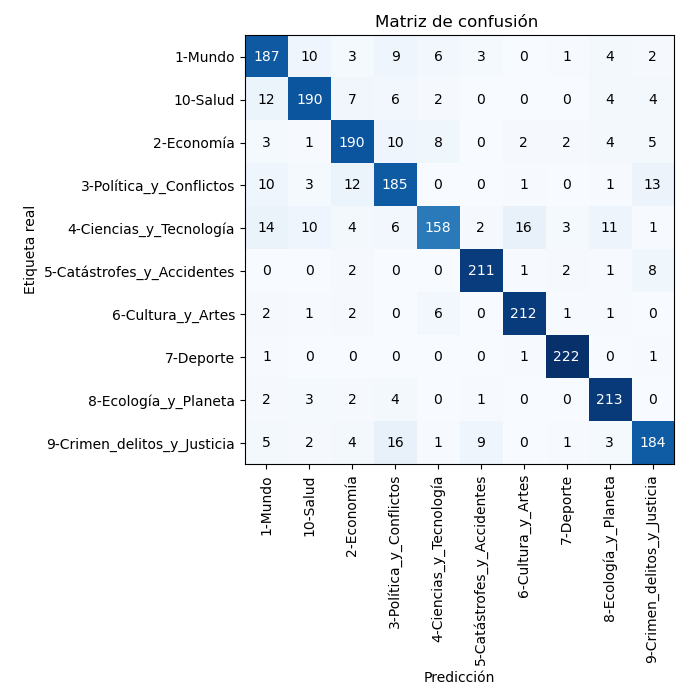

In [48]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
plot_confusion_matrix(cm, labels=lbs)

In [49]:
def predict_class(model, sentence, min_len = 4):

    tokenized = tokenizer(sentence)
    
    if len(tokenized) < min_len:
        tokenized += ['<pad>'] * (min_len - len(tokenized))
    device = 'cpu'
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(0)
    preds = model(tensor)
    print(preds)
    max_preds = preds.argmax(dim = 1)
    return max_preds.item()

In [50]:
noticia = """Sin embargo, estos experimentos se llevaban a cabo en secreto, y cuando otras secciones de Guardian se dieron cuenta, el proyecto se canceló de inmediato."""
cat_map.get(predict_class(best_model, noticia))

tensor([[ 0.0835, -0.3272, -0.2239,  0.0810,  0.4497, -0.6571,  0.5157, -0.2867,
          0.0867, -0.8786]], grad_fn=<AddmmBackward0>)


[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.


'6-Cultura_y_Artes'

In [51]:
cat_map.get(predict_class(best_model, "alexis y la copa america le pegoOoOooO"))

tensor([[-1.1043, -0.9103,  0.1673, -0.7738,  0.0216, -1.1974,  0.1989,  2.2848,
         -0.3541, -1.0759]], grad_fn=<AddmmBackward0>)


'7-Deporte'

In [52]:
noticia = """Artistas mexicanos retoman los espacios públicos a través de la danza. Más de 120 artistas de 16 estados de México se reúnen para dar vida al Encuentro Nacional de Danza 2021. El evento cultural se lleva a cabo en distintos puntos de la capital del país, entre ellos el Complejo Cultural Los Pinos.
"""
cat_map.get(predict_class(best_model, noticia))

tensor([[ 0.1365, -1.7467, -1.6049, -1.6037,  0.1169, -3.1973,  5.3332, -1.8778,
         -0.6124, -2.7219]], grad_fn=<AddmmBackward0>)


'6-Cultura_y_Artes'

# Comparar hiperparametros

gaurdar parametros utilizados y algunas metricas en tabla resumen

In [53]:
wanted_keys = ['test_loss', 'test_acc', 'best_valid_loss', 'LR', 'ds_name', 'MAX_LEN', 'DROPOUT', 
               'N_EPOCHS', 'best_epoch', 'dt', 'TOKENIZER', 'DEVICE_NAME', 'MAX_VOCAB_SIZE',
               'RANDOM_STATE', 'BATCH_SIZE', 'EMBEDDING_DIM', 'N_FILTERS', 'FILTER_SIZES',
               'OPTIMIZER', 'CRITERION', 'FREEZE_EMBEDDINGS',
              ]

In [54]:
from operator import itemgetter
wanted_values = list(itemgetter(*wanted_keys)(globals()))
hparams = dict(zip(wanted_keys, wanted_values))
saved = False
hparams

{'test_loss': 0.43857951819275814,
 'test_acc': 0.8659722225533591,
 'best_valid_loss': 0.40663374215364456,
 'LR': 0.0005,
 'ds_name': 'ds_semibalanced_1500_rs5150.csv',
 'MAX_LEN': 1600,
 'DROPOUT': 0.6,
 'N_EPOCHS': 10,
 'best_epoch': 8,
 'dt': '2021-12-14_23:09:41.769029',
 'TOKENIZER': 'tokenize_es_c',
 'DEVICE_NAME': 'cuda',
 'MAX_VOCAB_SIZE': 50000,
 'RANDOM_STATE': 1234,
 'BATCH_SIZE': 64,
 'EMBEDDING_DIM': 300,
 'N_FILTERS': 100,
 'FILTER_SIZES': [3, 4, 5],
 'OPTIMIZER': 'Adam',
 'CRITERION': 'CrossEntropyLoss',
 'FREEZE_EMBEDDINGS': True}

In [55]:
import pickle
try:
    with open ('./cnn_info', 'rb') as fp:
        attemps = pickle.load(fp)
    if not saved:
        attemps.append(hparams)
        saved = True
except FileNotFoundError:
    print('cnn_info not found...')
    attemps = [hparams]
finally:
    with open('./cnn_info', 'wb') as fp:
        pickle.dump(attemps, fp)

In [56]:
pd.DataFrame(attemps[-10:], columns=wanted_keys[:4]+['TOKENIZER', 'MAX_LEN', 'ds_name'])

,test_loss,test_acc,best_valid_loss,LR,TOKENIZER,MAX_LEN,ds_name
0,0.471291,0.854632,0.457884,0.0005,tokenize_es_c,1400,ds_semibalanced_1678_rs5150.csv
1,0.508087,0.838834,0.513970,0.0005,tokenize_es_c,1400,ds_balanced_1430_rs8008.csv
2,0.471291,0.854632,0.457884,0.0005,tokenize_es_c,1400,ds_semibalanced_1678_rs5150.csv
3,0.484171,0.838750,0.519165,0.0005,tokenize_es_c,1600,ds_balanced_1043_rs5150.csv
4,0.502096,0.845357,0.505051,0.0010,tokenize_es_c,1600,ds_balanced_1043_rs5150.csv
5,0.514742,0.831250,0.521274,0.0010,tokenize_es_a,1600,ds_balanced_1043_rs5150.csv
6,0.514742,0.831250,0.521274,NaN,tokenize_es_a,1600,ds_balanced_1043_rs5150.csv
7,0.439026,0.865972,0.410131,0.0007,tokenize_es_c,1600,ds_semibalanced_1500_rs5150.csv
8,0.435961,0.867274,0.405154,0.0005,tokenize_es_c,1600,ds_semibalanced_1500_rs5150.csv
9,0.438580,0.865972,0.406634,0.0005,tokenize_es_c,1600,ds_semibalanced_1500_rs5150.csv


In [57]:
wanted_keys = ['test_loss', 'test_acc', 'best_valid_loss', 'LR', 'ds_name', 'MAX_LEN', 'DROPOUT', 
               'N_EPOCHS', 'best_epoch', 'dt', 'DEVICE_NAME', 'MAX_VOCAB_SIZE',
               'RANDOM_STATE', 'BATCH_SIZE', 'EMBEDDING_DIM', 'N_FILTERS', 'FILTER_SIZES',
               'OPTIMIZER', 'CRITERION', 'FREEZE_EMBEDDINGS',
              ]

In [58]:
import pickle
import pandas as pd
with open ('./cnn_info', 'rb') as fp:
    attemps = pickle.load(fp)
pd.DataFrame(attemps[-9:], columns=wanted_keys)

,test_loss,test_acc,best_valid_loss,LR,ds_name,MAX_LEN,DROPOUT,N_EPOCHS,best_epoch,dt,DEVICE_NAME,MAX_VOCAB_SIZE,RANDOM_STATE,BATCH_SIZE,EMBEDDING_DIM,N_FILTERS,FILTER_SIZES,OPTIMIZER,CRITERION,FREEZE_EMBEDDINGS
0,0.508087,0.838834,0.513970,0.0005,ds_balanced_1430_rs8008.csv,1400,0.65,15,9,2021-12-13_18:14:55.374836,cuda,50000,8008,64,300,100,"[3, 4, 5]",Adam,CrossEntropyLoss,True
1,0.471291,0.854632,0.457884,0.0005,ds_semibalanced_1678_rs5150.csv,1400,0.65,15,8,2021-12-13_18:27:38.301156,cuda,50000,8008,64,300,100,"[3, 4, 5]",Adam,CrossEntropyLoss,True
2,0.484171,0.838750,0.519165,0.0005,ds_balanced_1043_rs5150.csv,1600,0.65,15,9,2021-12-14_21:23:33.742376,cuda,50000,8008,64,300,100,"[3, 4, 5]",Adam,CrossEntropyLoss,True
3,0.502096,0.845357,0.505051,0.0010,ds_balanced_1043_rs5150.csv,1600,0.50,10,5,2021-12-14_22:10:04.545212,cuda,50000,1234,64,300,100,"[3, 4, 5]",Adam,CrossEntropyLoss,True
4,0.514742,0.831250,0.521274,0.0010,ds_balanced_1043_rs5150.csv,1600,0.50,10,5,2021-12-14_22:17:20.856057,cuda,50000,1234,64,300,100,"[3, 4, 5]",Adam,CrossEntropyLoss,True
5,0.514742,0.831250,0.521274,NaN,ds_balanced_1043_rs5150.csv,1600,0.50,10,5,2021-12-14_22:25:43.115586,cuda,50000,1234,64,300,100,"[3, 4, 5]",Adam,CrossEntropyLoss,True
6,0.439026,0.865972,0.410131,0.0007,ds_semibalanced_1500_rs5150.csv,1600,0.65,10,7,2021-12-14_22:41:03.795547,cuda,50000,1234,64,300,100,"[3, 4, 5]",Adam,CrossEntropyLoss,True
7,0.435961,0.867274,0.405154,0.0005,ds_semibalanced_1500_rs5150.csv,1600,0.50,10,7,2021-12-14_22:56:47.286605,cuda,50000,1234,64,300,100,"[3, 4, 5]",Adam,CrossEntropyLoss,True
8,0.438580,0.865972,0.406634,0.0005,ds_semibalanced_1500_rs5150.csv,1600,0.60,10,8,2021-12-14_23:09:41.769029,cuda,50000,1234,64,300,100,"[3, 4, 5]",Adam,CrossEntropyLoss,True
